# 02. 텍스트 전처리

한국어에서 영어에서의 단어 토큰화와 유사한 형태를 얻으려면 어절 토큰화가 아니라 형태소 토큰화(morpheme tokenization)를 수행해야 한다.

한국어 자연어 처리를 위해서는 KoNLPy(코엔엘파이)라는 파이썬 패키지를 사용할 수 있다. KoNLPy를 통해서 사용할 수 있는 형태소 분석기로 Okt(Open Korea Text), 메캅(Mecab), 코모란(Komoran), 한나눔(Hannanum), 꼬꼬마(Kkma)가 있다.

In [2]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

print('단어 토큰화1 :',word_tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))
print('단어 토큰화2 :',WordPunctTokenizer().tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))
print('단어 토큰화3 :',text_to_word_sequence("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화1 : ['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']
단어 토큰화2 : ['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']
단어 토큰화3 : ["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


In [4]:
from konlpy.tag import Okt
from konlpy.tag import Kkma

okt = Okt()
kkma = Kkma()

print('OKT 형태소 분석 :',okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 품사 태깅 :',okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 명사 추출 :',okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요")) 

OKT 형태소 분석 : ['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']
OKT 품사 태깅 : [('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]
OKT 명사 추출 : ['코딩', '당신', '연휴', '여행']


In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

text = "나랑 점심 먹으러 갈래 점심 메뉴는 햄버거 갈래 갈래 햄버거 최고야"

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
print('단어 집합 :',tokenizer.word_index)

sub_text = "점심 먹으러 갈래 메뉴는 햄버거 최고야"
encoded = tokenizer.texts_to_sequences([sub_text])[0]
print(encoded)

one_hot = to_categorical(encoded)
print(one_hot)

단어 집합 : {'갈래': 1, '점심': 2, '햄버거': 3, '나랑': 4, '먹으러': 5, '메뉴는': 6, '최고야': 7}
[2, 5, 1, 6, 3, 7]
[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


# 03. 언어모델

* 언어 모델
  - 단어 시퀀스에 확률을 할당(assign) 하는 일을 하는 모델
  - 가장 자연스러운 단어 시퀀스를 찾아내는 모델
단어 시퀀스에 확률을 할당하게 하기 위해서 가장 보편적으로 사용되는 방법은 언어 모델이 이전 단어들이 주어졌을 때 다음 단어를 예측하도록 하는 것
  - SLM : 통계에 기반한 전통적인 언어 모델

* 언어 모델링(Language Modeling)
  - 주어진 단어들로부터 아직 모르는 단어를 예측하는 작업

* N-gram
  - n개의 연속적인 단어 나열
  - 갖고 있는 n개의 단어 뭉치 단위로 끈헝서 이를 하나의 토큰으로 간주
  - 최대 5를 넘게 잡아서는 안 된다고 권장됨

# 04. 카운트 기반의 단어 표현

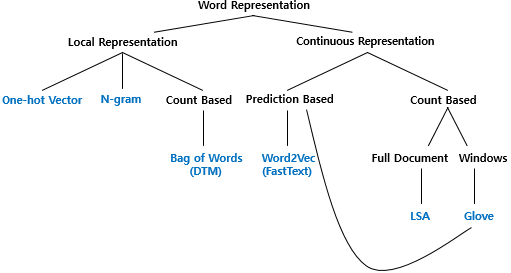



* BoW(Bag of Words)
  - 단어들의 순서는 고려하지 않고, 출현 빈도에만 집중하는 텍스트 데이터의 수치화 표현 방법
  -
  (1) 각 단어에 고유한 정수 인덱스 부여
  (2) 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터 생성

* DTM(Document-Term Matrix) : 문서 단어 행렬
  - 각 문서에 대한 BoW를 하나의 행렬로 만드는 것

* TF-IDF(Term Frequency-Inverse Document Frequency)
  - 단어의 빈도와 역 문서 빈도(문서의 빈도에 특정 식을 취함)를 사용하여 DTM 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법
  - (1) tf(d,t) : 특정 문서 d에서의 특정 단어 t의 등장 횟수.
  - (2) df(t) : 특정 단어 t가 등장한 문서의 수.
  - (3) idf(d, t) : df(t)에 반비례하는 수.

In [8]:
from konlpy.tag import Okt

okt = Okt()

def build_bag_of_words(document):
  # 온점 제거 및 형태소 분석
  document = document.replace('.', '')
  tokenized_document = okt.morphs(document)

  word_to_index = {}
  bow = []

  for word in tokenized_document:  
    if word not in word_to_index.keys():
      word_to_index[word] = len(word_to_index)  
      # BoW에 전부 기본값 1을 넣는다.
      bow.insert(len(word_to_index) - 1, 1)
    else:
      # 재등장하는 단어의 인덱스
      index = word_to_index.get(word)
      # 재등장한 단어는 해당하는 인덱스의 위치에 1을 더한다.
      bow[index] = bow[index] + 1

  return word_to_index, bow

doc1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."
vocab, bow = build_bag_of_words(doc1)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

doc2 = '소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.'

vocab, bow = build_bag_of_words(doc2)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

doc3 = doc1 + ' ' + doc2
vocab, bow = build_bag_of_words(doc3)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
bag of words vector : [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]
vocabulary : {'소비자': 0, '는': 1, '주로': 2, '소비': 3, '하는': 4, '상품': 5, '을': 6, '기준': 7, '으로': 8, '물가상승률': 9, '느낀다': 10}
bag of words vector : [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]
vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9, '는': 10, '주로': 11, '소비': 12, '상품': 13, '을': 14, '기준': 15, '으로': 16, '느낀다': 17}
bag of words vector : [1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]


# 06. 머신 러닝

* 하이퍼 파라미터
  - 모델의 성능에 영향을 주는 사람이 값을 지정하는 변수
* 매개변수
  - 가중치와 편향
  - 학습을 하는 동안 값이 계속해서 변하는 수

* 회귀
  - 선형 회귀(Linear Regression)
  - 어떠한 연속적인 값의 범위 내에서 예측값이 나오는 경우
  - 기존의 분류 문제와 같이 분리된(비연속적인) 답이 결과가 아니라 연속된 값을 결과로 가지는 문제

* 분류
  - 로지스틱 회귀(Logistic Regression)
  - 주어진 입력에 대해서 두 개의 선택지 중 하나의 답을 선택해야 하는 경우

* 혼동 행렬
  - 맞춘 결과와 틀린 결과에 대한 세부적인 내용을 위해서 사용
  - True Positive(TP) : 실제 True인 정답을 True라고 예측 (정답)
  - False Positive(FP) : 실제 False인 정답을 True라고 예측 (오답)
  - False Negative(FN) : 실제 True인 정답을 False라고 예측 (오답)
  - True Negative(TN) : 실제 False인 정답을 False라고 예측 (정답)
---
* 과적합
  - 훈련 데이터를 과하게 학습한 경우

* 과소 적합
  - 테스트 데이터의 성능이 올라갈 여지가 있음에도 훈련을 덜 한 상태
---
* 선형 회귀(Linear Regression)
  - 한 개 이상의 독립 변수 x와 y의 선형 관계를 모델링
  - 독립 변수가 1개라면 단순 선형 회귀
  - 독립 변수가 여러 개라면 다중 선형 회귀
* 로지스틱 회귀
  - 2개 중 하나를 결정하는 문제를 풀기 위한 대표적인 알고리즘
* 소프트맥스 회귀
  - 3개 이상의 선택지 중에서 1개를 고르는 다중 클래스 분류 문제를 위한 회귀
---
* 목적함수/비용함수/손실함수
  - 실제값과 예측값에 대한 오차에 대한 식
  - 선형 회귀(회귀) : 평균 제곱 오차(Mean Squared Error, MSE) 사용
  - 로지스틱 회귀(분류) : 크로스 엔트로피 함수
  - 소프트맥스 회귀(분류) : 크로스 엔트로피 함수
* 옵티마이저
  - 비용 함수를 최소화 하는 매개변수인 w와 b를 찾기 위한 알고리즘
  - 훈련/학습 : 옵티마이저를 통해 적절한 w와 b를 찾아내는 과정
  - 경사하강법 : 대표적인 옵티마이저 알고리즘
---
* 시그모이드 함수
  - 입력된 데이터에 대해서 0과 1사이의 값을 출력하여 해당 값이 둘 중 하나에 속할 확률로 해석할 수 있도록 만들어준다

* 소프트맥스 함수
  - 선택해야 하는 선택지의 총 개수를 k라고 할 때, k차원의 벡터를 입력받아 각 클래스에 대한 확률을 추정


# 07. 딥 러닝

* 딥 러닝
  - 머신 러닝의 특정한 한 분야로, 인공 신경망의 층을 연속적으로 깊게 쌓아올려 데이터를 학습하는 방식
* 퍼셉트론
  - 인공 신경망으로 다수의 입력으로부터 하나의 결과를 내보내는 알고리즘
* 활성화 함수
  - 뉴런에서 출력값을 변경시키는 함수
    - 1) 계단 함수
    - 2) 시그모이드 함수
      - 이진 분류 문제에 사용
      - 은닉층에서 사용하면 매개변수 w가 업데이트 되지 않아 학습이 안되기 때문에 사용을 지양
    - 3) 하이퍼볼릭탄젠트 함수
    - 4) 렐루 함수
    - 5) 리키 렐루 함수
    - 6) 소프트맥스 함수
      - 시그모이드 함수처럼 출력층에서 주로 사용
      - 다중 클래스 분류 문제에 사용
* 심층 신경망
  - 은닉층이 2개 이상인 신경망
* 에포크
  - 인공 신경망에서 전체 데이터에 대해서 순전파와 역전파가 끝난 상태
  - 에포크 횟수가 지나치거나 너무 적으면 앞서 배운 과적합과 과소적합이 발생할 수 있다.
* 배치 크기
  - 몇 개의 데이터 단위로 매개변수를 업데이트 하는지
* 이터레이션
  - 한 번의 에포크를 끝내기 위해서 필요한 배치의 수
  - 전체 데이터가 2,000일 때 배치 크기를 200으로 한다면 이터레이션의 수는 총 10
---
* 기울기 소실
  - 입력층에 가까운 층들에서 가중치들이 업데이트가 제대로 되지 않으면 결국 최적의 모델을 찾을 수 없게 되는 현상
* 기울기 폭주
  - 기울기가 점차 커지더니 가중치들이 비정상적으로 큰 값이 되면서 결국 발산되는 현상
---
* 다층 퍼셉트론(MLP)
  - 단층 퍼셉트론의 형태에서 은닉층이 1개 이상 추가된 신경망
* 피드 포워드 신경망
  - 입력층에서 출력층으로 오직 한 방향으로만 연산 방향이 정해져 있는 신경망




# 08. 순환 신경망

* FFNN(피드 포워드 신경망)
  - 은닉층에서 활성화 함수를 지난 값이 오직 출력층 방향으로만 향하는 신경망

* RNN(순환 신경망)
  - 은닉층의 노드에서 활성화 함수를 통해 나온 결과값을 출력층 방향으로도 보내고, 다시 은닉층 노드의 다음 계산의 입력으로 보내는 신경망

# 09. 워드 임배딩

* 희소 표현
  - 벡터 또는 행렬의 값이 대부분이 0으로 표현되는 방법
  - 단어의 개수가 늘어나면 벡터의 차원이 한없이 커짐
  - 단어의 의미를 표현하지 못함
  - 원핫벡터 : 단어 벡터간 유의미한 유사도를 계산할 수 없다
  - DTM도 희소 벡터의 일종

* 밀집 표현
  - 워드 임베딩(word embedding) : 밀집 벡터의 형태로 표현하는 방법;분산 표현을 이용하여 단어 간 의미적 유사성을 벡터화하는 작업 
  
  - 워드 임베딩 방법론으로는 LSA, Word2Vec, FastText, Glove 등이 있다.
---
* Word2Vec(워드투벡터)
  - 단어 벡터 간 유의미한 유사도를 반영할 수 있도록 단어의 의미를 수치화 할 수 있는 방법
  - Word2Vec의 학습 방식에는 CBOW(Continuous Bag of Words)와 Skip-Gram 두 가지 방식이 있다.
    - CBOW : 주변 단어를 통해 중심 단어를 예측
    - Skip-gram : 중심 단어에서 주변 단어를 예측
    - 전반적으로 Skip-gram이 CBOW보다 성능이 좋다고 알려져 있다.
  - Word2Vec에서 입력은 모두 원-핫 벡터가 되어야 한다.
  - Word2Vec은 은닉층이 다수인 딥 러닝(deep learning) 모델이 아니라 은닉층이 1개인 얕은 신경망이다.
  - Word2Vec의 은닉층은 일반적인 은닉층과는 달리 활성화 함수가 존재하지 않으며 룩업 테이블이라는 연산을 담당하는 층으로 투사층이라고 부르기도 한다.

* GloVe(글로브)
  - 미국 스탠포드대학에서 개발한 단어 임베딩 방법
  - 카운트 기반과 예측 기반을 모두 사용
  - 카운트 기반의 LSA(Latent Semantic Analysis)와 예측 기반의 Word2Vec의 단점을 지적하며 이를 보완한다는 목적
  - 

* FastText(패스트텍스트)
  - 페이스북에서 개발한 단어를 벡터로 만드는 또 다른 방법
  - Word2Vec 이후에 나온, 메커니즘 자체는 Word2Vec의 확장판
  - Word2Vec는 단어를 쪼개질 수 없는 단위로 생각한다면, FastText는 하나의 단어 안에도 여러 단어들이 존재하는 것으로 간주;내부 단어. 즉, 서브워드(subword)를 고려하여 학습
    - FastText에서는 각 단어는 글자 단위 n-gram의 구성으로 취급
    - 시작과 끝을 의미하는 <, >를 도입하여 내부 단어(subword)와 기존 단어 토큰 벡터로 만듬 
    - ex) 트라이그램(tri-gram)의 경우, apple은 app, ppl, ple로 분리하고 이들을 벡터로 만든다 : <ap, app, ppl, ple, le>, <apple>

* ELMo(엘모, Embeddings from Language Model)
  - 새로운 워드 임베딩 방법
  - 사전 훈련된 언어 모델을 사용
  - 워드 임베딩 시 문맥을 고려해서 임베딩


# 14. RNN을 이용한 인코더-디코더


* 시퀀스-투-시퀀스(Sequence-to-Sequence, seq2seq)
  - 입력된 시퀀스로부터 다른 도메인의 시퀀스를 출력하는 다양한 분야에서 사용되는 모델
  - 번역기에서 대표적으로 사용되는 모델
  - 크게 인코더와 디코더라는 두 개의 모듈로 구성
    - 인코더는 입력 문장의 모든 단어들을 순차적으로 입력받은 뒤에 마지막에 이 모든 단어 정보들을 압축해서 하나의 벡터(컨텍스트 벡터)로 만듬
    - 디코더는 컨텍스트 벡터를 받아서 번역된 단어를 한 개씩 순차적으로 출력




# 15. 어텐션 메커니즘

* RNN에 기반한 seq2seq 모델의 보완책
  - seq2seq의 문제점
    - 하나의 고정된 크기의 벡터에 모든 정보를 압축하려고 하니까 정보 손실이 발생
    - RNN의 고질적인 문제인 기울기 소실 문제가 존재
  - 문제점들로 인해 번역 분야에서 입력 문장이 길면 번역 품질이 떨어지는 현상 발생
  - 입력 시퀀스가 길어지면 출력 시퀀스의 정확도가 떨어지는 것을 보정해주기 위해 등장한 기법

* 어텐션의 아이디어
  - 디코더에서 출력 단어를 예측하는 매 시점마다, 인코더에서의 전체 입력 문장을 다시 한 번 참고
  - 해당 시점에서 예측해야할 단어와 연관이 있는 입력 단어 부분을 좀 더 집중

* 어텐션 함수
  - Attention Value = Attention(Q, K, V)
    - Q = Query : t 시점의 디코더 셀에서의 은닉 상태
    - K = Keys : 모든 시점의 인코더 셀의 은닉 상태들
    - V = Values : 모든 시점의 인코더 셀의 은닉 상태들
    - t = 어텐션 메커니즘이 수행되는 디코더 셀의 현재 시점을 의미.

* 어텐션의 종류
  - 닷-프로덕트 어텐션(Dot-Product Attention)
  - 바다나우 어텐션(Bahdanau Attention)
  
* 어텐션의 연산 순서
  - 어텐션 스코어를 구한다
  - 소프트맥스 함수를 통해 어텐션 분포를 구한다
  - 각 인코더의 어텐션 가중치와 은닉 상태를 가중합하여 어텐션 값을 구한다
  - 컨텍스트 벡터로부터 st를 구한다


* 바다나우 어텐션
  - Attention Value = Attention(Q, K, V)
  - Q = Query : t-1 시점의 디코더 셀에서의 은닉 상태
  - K = Keys : 모든 시점의 인코더 셀의 은닉 상태들
  - V = Values : 모든 시점의 인코더 셀의 은닉 상태들
    - t = 어텐션 메커니즘이 수행되는 디코더 셀의 현재 시점을 의미.